In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json
from tensorflow.keras.layers import  BatchNormalization
import tensorflow as tf
import PIL

Using TensorFlow backend.


In [18]:
import cv2
import os
imdir = r'..\transfer-learning-Resnet50\data\validation\women'
myDir = r'..\transfer-learning-Resnet50\data\validation\women'
n=0
for imfile in os.scandir(myDir):
    imageName=imfile.path.split('\\')[-1]
    name = imageName.split('.')
    imageName = name[0]+'.jpg'
    originalImage = cv2.imread(imfile.path)
    dim = (224, 224)
    resized = cv2.resize(originalImage, dim, interpolation = cv2.INTER_LANCZOS4)
    os.remove(imfile.path)
    cv2.imwrite(os.path.join(imdir , imageName),resized)
imdir = r'..\transfer-learning-Resnet50\data\train\women'
myDir = r'..\transfer-learning-Resnet50\data\train\women'
n=0
for imfile in os.scandir(myDir):
    imageName=imfile.path.split('\\')[-1]
    name = imageName.split('.')
    imageName = name[0]+'.jpg'
    originalImage = cv2.imread(imfile.path)
    dim = (224, 224)
    resized = cv2.resize(originalImage, dim, interpolation = cv2.INTER_LANCZOS4)
    os.remove(imfile.path)
    cv2.imwrite(os.path.join(imdir , imageName),resized)
imdir = r'..\transfer-learning-Resnet50\data\train\men'
myDir = r'..\transfer-learning-Resnet50\data\train\men'
n=0
for imfile in os.scandir(myDir):
    imageName=imfile.path.split('\\')[-1]
    name = imageName.split('.')
    imageName = name[0]+'.jpg'
    originalImage = cv2.imread(imfile.path)
    dim = (224, 224)
    resized = cv2.resize(originalImage, dim, interpolation = cv2.INTER_LANCZOS4)
    os.remove(imfile.path)
    cv2.imwrite(os.path.join(imdir , imageName),resized)

imdir = r'..\transfer-learning-Resnet50\data\validation\men'
myDir = r'..\transfer-learning-Resnet50\data\validation\men'
n=0
for imfile in os.scandir(myDir):
    imageName=imfile.path.split('\\')[-1]
    name = imageName.split('.')
    imageName = name[0]+'.jpg'
    originalImage = cv2.imread(imfile.path)
    dim = (224, 224)
    resized = cv2.resize(originalImage, dim, interpolation = cv2.INTER_LANCZOS4)
    os.remove(imfile.path)
    cv2.imwrite(os.path.join(imdir , imageName),resized)

In [5]:
input_path = r"..\transfer-learning-Resnet50\data\\"

In [6]:
train_datagen = ImageDataGenerator(
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    input_path + 'train',
    batch_size=32,
    class_mode='binary',
    target_size=(224,224))

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
    input_path + 'validation',
    shuffle=False,
    class_mode='binary',
    target_size=(224,224))

Found 71 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [21]:
conv_base = ResNet50(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    if isinstance(layer, keras.layers.normalization.BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False
for layer in conv_base.layers[-4:]:
    layer.trainable = True

C:\Users\chrif\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [22]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(2, activation='softmax')(x)
model = Model(conv_base.input, predictions)

In [23]:
optimizer = keras.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy']) 

In [24]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=train_generator.samples/train_generator.batch_size,  # added in Kaggle
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=validation_generator.samples/validation_generator.batch_size  # added in Kaggle
                             )

Epoch 1/20
3/2 [========================================] - 92s 31s/step - loss: 1.4758 - accuracy: 0.4930 - val_loss: 0.5768 - val_accuracy: 0.7333
Epoch 2/20
3/2 [========================================] - 87s 29s/step - loss: 0.4242 - accuracy: 0.7606 - val_loss: 0.5142 - val_accuracy: 0.8000
Epoch 3/20
3/2 [========================================] - 93s 31s/step - loss: 0.1677 - accuracy: 0.9718 - val_loss: 0.3206 - val_accuracy: 0.8000
Epoch 4/20
3/2 [========================================] - 85s 28s/step - loss: 0.1187 - accuracy: 0.9718 - val_loss: 0.4124 - val_accuracy: 0.8667
Epoch 5/20
3/2 [========================================] - 90s 30s/step - loss: 0.1197 - accuracy: 0.9859 - val_loss: 0.3732 - val_accuracy: 0.8000
Epoch 6/20
3/2 [========================================] - 89s 30s/step - loss: 0.0442 - accuracy: 1.0000 - val_loss: 0.3668 - val_accuracy: 0.7333
Epoch 7/20
3/2 [========================================] - 86s 29s/step - loss: 0.0887 - accuracy: 0.9718

In [25]:
# save
model.save_weights(r'..\transfer-learning-Resnet50\models\WeightsModel.h5')
with open(r'..\transfer-learning-Resnet50\models\ArchitectureModel.json', 'w') as f:
        f.write(model.to_json())

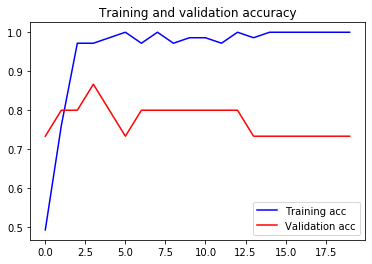

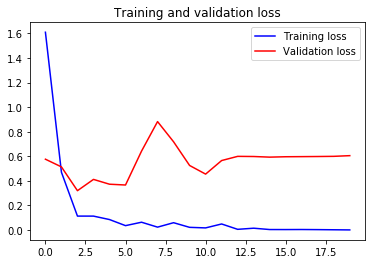

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:

from keras.models import Sequential
from keras.layers import Dense
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json
from tensorflow.keras.layers import  BatchNormalization
import tensorflow as tf
import PIL

In [8]:
# load json and create model
json_file = open(r'..\transfer-learning-Resnet50\models\ArchitectureModel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(r"..\transfer-learning-Resnet50\models\WeightsModel.h5")
print("Loaded model from disk")


Loaded model from disk


In [14]:
validation_img_paths = [r"..\transfer-learning-Resnet50\data\validation\men\misclassed (1).jpg",
                       r"..\transfer-learning-Resnet50\data\validation\men\00002333.jpg",
                       r"..\transfer-learning-Resnet50\data\validation\men\00002324.jpg",
                       r"..\transfer-learning-Resnet50\data\validation\men\00002334.jpg",
                       r"..\transfer-learning-Resnet50\data\validation\women\missclassed (6).jpg",
                       r"..\transfer-learning-Resnet50\data\validation\women\missclassed (8).jpg"]
img_list = [Image.open(img_path) for img_path in validation_img_paths]
validation_batch = np.stack([preprocess_input(np.array(img.resize((224,224))))
                             for img in img_list])
pred_probs = loaded_model.predict(validation_batch)
pred_probs

array([[9.9999988e-01, 6.7864377e-08],
       [9.9999714e-01, 2.8808386e-06],
       [9.9999988e-01, 1.0075050e-07],
       [9.9714273e-01, 2.8572825e-03],
       [8.6940410e-05, 9.9991310e-01],
       [2.2691424e-09, 1.0000000e+00]], dtype=float32)

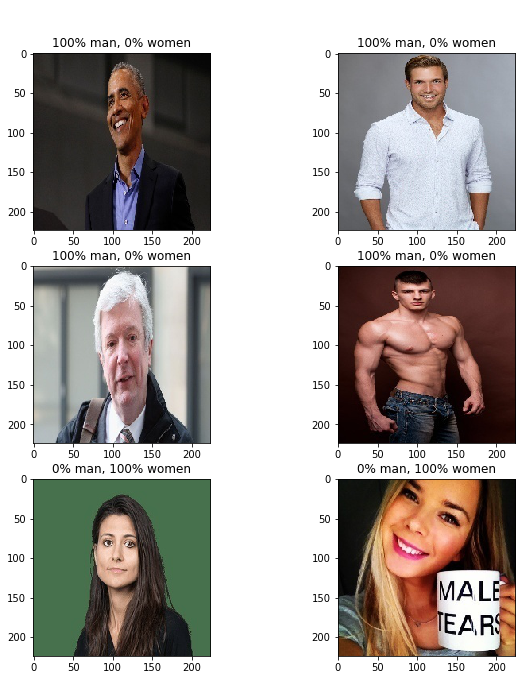

In [15]:
plt.figure(figsize=(10,15))
columns = 2
for i, image in enumerate(img_list):
    (plt.subplot(len(img_list) / columns + 1, columns, i + 1)).title.set_text("\n \n{:.0f}% man, {:.0f}% women".format(100*pred_probs[i,0],
                                                            100*pred_probs[i,1]
                                                            ))
   
    plt.imshow(image)